## Using a saved Cats v Dogs Model

This is a minimal example showing how to use a saved fastai model. The exported app.py, the model (pkl), the images and the requirements.txt can be uploaded to huggingface.

In [36]:
# Make sure we've got the latest version of fastai:
# uninstall numpy fist. Somehow this does not work via pip. Delete the numpy folders in the lib folder.

!pip install numpy==1.23.5

# do not use python 3.11, install of fastai does not work. No problems with 3.10.9

!pip install -Uqq fastai Cython nbdev gradio jupyterlab-quarto

Perform the notebook 02 which will lead to the file model.pkl. First, import all the stuff we need from fastai. Also redefine the is_cat function which is used by the model.

In [8]:
#|default_exp app

In [9]:
#|export

from fastai.vision.all import *
import gradio as gr
import pathlib

# needed because model was trained on windows but runs on linux
plt = platform.system()
if plt != 'Windows': pathlib.WindowsPath = pathlib.PosixPath

def is_cat(x): return x[0].isupper() 

Load an example image

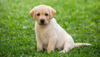

In [7]:
im = PILImage.create('dog.jpg')
im.thumbnail((100, 100))
im

Import the saved learner:

In [10]:
#|export

learn = load_learner('model.pkl')

Predict the loaded image:

In [11]:
learn.predict(im)

('False', tensor(0), tensor([1.0000e+00, 3.3209e-07]))

Create a gradio interface. Gradio is expecting a classify function. Map is converting the TensorBase type to float, which gradio does understand. dict zip is zipping the two dictionaries into a dictionary and two lists into a dictionary.

In [12]:
#|export

categories = ('Dog', 'Cat')

def classify_images(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [15]:
classify_images(im)

{'Dog': 0.9999996423721313, 'Cat': 3.3209394700861594e-07}

Create a gradio interface:

In [16]:
#|export

image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_images, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

C:\Users\simon\AppData\Local\Temp\ipykernel_8384\1680209887.py:3: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192,192))
C:\Users\simon\AppData\Local\Temp\ipykernel_8384\1680209887.py:3: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192,192))
C:\Users\simon\AppData\Local\Temp\ipykernel_8384\1680209887.py:4: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
C:\Users\simon\AppData\Local\Temp\ipykernel_8384\1680209887.py:4: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Export the tagges code cells to app.py

In [40]:
import nbdev

nbdev.export.nb_export('02.2-using-a-saved-basic-fastai-model.ipynb', './')
